In [357]:
import pandas as pd

test_fever = pd.read_csv('/opt/math/jupyter/ntr/Experiments_with_text/data/FEVER/test_oversampled.csv')
# train_fever = pd.read_csv('/opt/math/jupyter/ntr/Experiments_with_text/data/SNLI/train_snli_style_sampling_2.csv')

In [310]:
def clean_hyp(text):
    text = str(text)
    dot_id = text.rfind('.')
    if dot_id > 0:
        text = text[1:dot_id+1]
    else:
        text = text[1:]
        t_id = text.find('\t')
        if t_id > 0:
            text = text[:t_id]
    return text

def clean_hyp(text):
    text = str(text)
    dot_id = text.rfind('.')
    if dot_id > 0:
        text = text[1:dot_id+1]
    else:
        text = text[1:]
        t_id = text.find('\t')
        if t_id > 0:
            text = text[:t_id]
    return text

def clean_hyp(text):
    text = str(text)
    if text[:1] == '\t':
        text = text[1:]
    
    t_id = text.find('\t')
    if t_id > 0:
        text = text[:t_id]
    return text

train_fever.hypothesis = train_fever.hypothesis.apply(clean_hyp).astype(str)

In [311]:
train_fever.to_csv('/opt/math/jupyter/ntr/Experiments_with_text/data/SNLI/train_snli_style_sampling.csv', index = False)

In [257]:
train_fever.hyp_filtered.astype(str).apply(len).mean()

156.9793987341772

In [258]:
train_fever.hypothesis.astype(str).apply(len).mean()

248.68786392405065

# Analyzing duplicates in texts: 

Possible filtering techniques: 

- full duplicates removal (involve contradiction samples removal)
- balancing classes in case the same hypothesis always correspond to one class
- General class balancing (redusing number of NEI class)

## Step 1

In [259]:
len(train_fever)

379200

In [260]:
tmp = train_fever.duplicated(['claim', 'hypothesis'])
tmp2 = train_fever.duplicated(['claim', 'hypothesis', 'label'])

train_fever[tmp & (~ tmp2)]

,claim,hypothesis,label,hyp_filtered
6769,"Pitch Perfect 3 stars Anna Kendrick, Anna Camp...",\tA sequel to 2015 's Pitch Perfect 2 and the ...,SUPPORTS,A sequel to 2015 's Pitch Perfect 2 and the th...
8651,Dustin Hoffman is an award-winning actor.,\tHoffman received the AFI Life Achievement Aw...,SUPPORTS,Hoffman received the AFI Life Achievement Awar...
9488,International Relations only includes the ente...,\tInternational relations is an academic and a...,NOT ENOUGH INFO,International relations is an academic and a p...
13172,Meryl Streep is an award losing actress.,\tStreep has also received 30 Golden Globe nom...,SUPPORTS,Streep has also received 30 Golden Globe nomin...
13173,Meryl Streep is an award losing actress.,"\tNominated for 20 Academy Awards , Streep has...",NOT ENOUGH INFO,"Nominated for 20 Academy Awards , Streep has m..."
...,...,...,...,...
377870,Hawaii is a state.,\tHawaii -LRB- -LSB- langpronaudio = en-us-Haw...,NOT ENOUGH INFO,Hawaii -LRB- -LSB- langpronaudio = en-us-Hawaii .
378541,John Lennon stayed in accounting his whole life.,\tLennon disengaged himself from the music bus...,NOT ENOUGH INFO,Lennon disengaged himself from the music busin...
378815,Minos fathered a child.,"\tBy Androgeneia of Phaestus he had Asterion ,...",NOT ENOUGH INFO,"By Androgeneia of Phaestus he had Asterion , w..."
379075,James Taylor made an album.,"\tFollowing his 1977 album , JT , he has retai...",NOT ENOUGH INFO,"Following his 1977 album , JT , he has retaine..."


In [261]:
train_fever[train_fever.claim == 'Meryl Streep is an award losing actress.']

,claim,hypothesis,label,hyp_filtered
7069,Meryl Streep is an award losing actress.,\tShe returned to the stage for the first time...,REFUTES,She returned to the stage for the first time i...
7070,Meryl Streep is an award losing actress.,\tStreep has also received 30 Golden Globe nom...,REFUTES,Streep has also received 30 Golden Globe nomin...
7071,Meryl Streep is an award losing actress.,\tStreep was awarded the AFI Life Achievement ...,REFUTES,Streep was awarded the AFI Life Achievement Aw...
7072,Meryl Streep is an award losing actress.,"\tIn 2017 , Streep was awarded the Golden Glob...",REFUTES,"In 2017 , Streep was awarded the Golden Globe ..."
7073,Meryl Streep is an award losing actress.,"\tNominated for 20 Academy Awards , Streep has...",REFUTES,"Nominated for 20 Academy Awards , Streep has m..."
7074,Meryl Streep is an award losing actress.,\tPresident Barack Obama awarded her the 2010 ...,REFUTES,President Barack Obama awarded her the 2010 Na...
7075,Meryl Streep is an award losing actress.,\tCited in the media as the `` best actress of...,REFUTES,Cited in the media as the `` best actress of h...
7076,Meryl Streep is an award losing actress.,\tMary Louise `` Meryl '' Streep -LRB- born Ju...,NOT ENOUGH INFO,Mary Louise `` Meryl '' Streep -LRB- born June...
7077,Meryl Streep is an award losing actress.,\tShe made her screen debut in the 1977 televi...,NOT ENOUGH INFO,She made her screen debut in the 1977 televisi...
7078,Meryl Streep is an award losing actress.,\tShe went on to win Best Supporting Actress f...,NOT ENOUGH INFO,She went on to win Best Supporting Actress for...


In [262]:
train_fever = train_fever.drop_duplicates(['claim', 'hypothesis'])
len(train_fever)

345716

In [272]:
(379200 - 345716)/379200

0.08830168776371308

In [276]:
train_fever.loc[13172].hypothesis

'\tStreep has also received 30 Golden Globe nominations , winning eight -- more nominations , and more competitive wins than any other actor .\thas also received\tList of awards and nominations received by Meryl Streep\tGolden Globe\tGolden Globe Awards'

In [277]:
(345716 - 319716)/379200

0.06856540084388185

## Step 2: look for claims that correspond to one class

get top 20% most frequent hypothesis and slightly equalize the classess (select randomly number of samples to dop) where number of samples determined with random picking the integer between 0 and n_magor_class - n_minor_class.

In [263]:
train_fever.hyp_filtered.value_counts().head(3)

He is best known for his collaborations with Andrew Lloyd Webber , with whom he wrote Joseph and the Amazing Technicolor Dreamcoat , Jesus Christ Superstar , and Evita ; with Björn Ulvaeus and Benny Andersson of ABBA , with whom he wrote Chess ; for additional songs for the 2011 West End revival of The Wizard of Oz ; and for his work for Walt Disney Studios with Alan Menken -LRB- Aladdin , Beauty and the Beast , King David -RRB- , Elton John -LRB- The Lion King , Aida , The Road to El Dorado -RRB- and Ennio Morricone .    121
A Song of Ice and Fire is a series of epic fantasy novels by the American novelist and screenwriter George R. R. Martin .                                                                                                                                                                                                                                                                                                                                                           

In [264]:
text = 'He is best known for his collaborations with Andrew Lloyd Webber , with whom he wrote Joseph and the Amazing Technicolor Dreamcoat , Jesus Christ Superstar , and Evita ; with Björn Ulvaeus and Benny Andersson of ABBA , with whom he wrote Chess ; for additional songs for the 2011 West End revival of The Wizard of Oz ; and for his work for Walt Disney Studios with Alan Menken -LRB- Aladdin , Beauty and the Beast , King David -RRB- , Elton John -LRB- The Lion King , Aida , The Road to El Dorado -RRB- and Ennio Morricone .'

print(train_fever[train_fever.hyp_filtered == text].label.value_counts())
print(test_fever[test_fever.hyp_filtered == text].label.value_counts())

SUPPORTS    85
REFUTES     36
Name: label, dtype: int64
Series([], Name: label, dtype: int64)


In [265]:
train_fever.hyp_filtered.value_counts().quantile(0.8)

9.0

In [266]:
import numpy as np
from tqdm.auto import tqdm

tmp = train_fever.hyp_filtered.value_counts()
freq_hyp = list(tmp[tmp > 9].index) # top 25%

for text in tqdm(freq_hyp):
    tmp_sample = train_fever[train_fever.hyp_filtered == text]
    freq_dict = tmp_sample.label.value_counts().to_dict()

    support = freq_dict.get('SUPPORTS', 0)
    refute = freq_dict.get('REFUTES', 0)

    if support > refute:
        key_to_drop = 'SUPPORTS'
        n_drop = np.random.choice(np.arange(0, support - refute))
    elif support < refute:
        key_to_drop = 'REFUTES'
        n_drop = np.random.choice(np.arange(0, refute - support))
    else:
        continue

    indexes_to_drop = np.random.choice(list(tmp_sample[tmp_sample.label == key_to_drop].index), n_drop, replace = False)
    train_fever.drop(indexes_to_drop, inplace=True)

In [267]:
len(train_fever)

319716

In [278]:
(319716 - 273322)/379200

0.12234704641350211

## Step 3: make the NEI class more equal less dominant



In [268]:
freq_dict = train_fever.label.value_counts().to_dict()
print(freq_dict)

support = freq_dict.get('SUPPORTS', 0)
refute = freq_dict.get('REFUTES', 0)
nei = freq_dict.get('NOT ENOUGH INFO', 0)

desired_number_to_drop = nei - np.max([support, refute])

indexes_to_drop = np.random.choice(list(train_fever[train_fever.label == 'NOT ENOUGH INFO'].index), desired_number_to_drop, replace = False)

train_fever.drop(indexes_to_drop, inplace=True)

{'NOT ENOUGH INFO': 155989, 'SUPPORTS': 109595, 'REFUTES': 54132}


In [269]:
len(train_fever)

273322

In [270]:
train_fever.to_csv('/opt/math/jupyter/ntr/Experiments_with_text/data/SNLI/train_snli_style_sampling_clean_filltered.csv', index = False)

<AxesSubplot:>

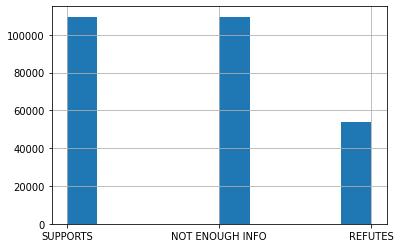

In [271]:
train_fever.label.hist()

In [279]:
freq_dict = train_fever.label.value_counts().to_dict()
print(freq_dict)

{'NOT ENOUGH INFO': 175159, 'SUPPORTS': 147111, 'REFUTES': 56930}


In [356]:
axisX = alt.Axis(gridDash = [0,2,0], grid=False,  
                 domain=False, 
                 ticks=False,
                 labelAngle = 0,
                 labelFontSize = 15,
                 labelPadding = 7,
                 titleFontSize = 18,
                 titleFontWeight = 300,
                 titlePadding = 10,
                 titleAngle = 0)

axisY = alt.Axis(gridDash = [0,2,0], grid=True,  
                 domain=False, 
                 ticks=False,
                 labelAngle = 0,
                 labelFontSize = 15,
                 labelPadding = 7,
                 titleFontSize = 18,
                 titleFontWeight = 300,
                 titlePadding = 10)


n = [175159,  147111, 56930, 109595, 109595, 54132]
c = ['NOT ENOUGH INFO', 'SUPPORTS', 'REFUTES', 'NOT ENOUGH INFO', 'SUPPORTS', 'REFUTES']
s = ['original', 'original', 'original', 'filtered', 'filtered', 'filtered']

df = pd.DataFrame({'n':n, 'c':c, 's': s})
print(df)

import altair as alt

alt.Chart(df).mark_bar().encode(
    x=alt.X('s:N', title = 'Dataset version', axis=axisX),
    y=alt.Y('n:Q', title = 'Number of samples', axis=axisY),
    color=alt.Color('s:N', title = 'Dataset version', legend = alt.Legend(labelFontSize = 15, titleFontSize = 18)),
    column = alt.Column('c:N', title = 'Lable type', header=alt.Header(titleFontSize=18, labelFontSize=18, titleFontWeight = 300, labelFontWeight= 300))
).properties(width=180, height=200).configure_view(
    stroke='transparent'
)

        n                c         s
0  175159  NOT ENOUGH INFO  original
1  147111         SUPPORTS  original
2   56930          REFUTES  original
3  109595  NOT ENOUGH INFO  filtered
4  109595         SUPPORTS  filtered
5   54132          REFUTES  filtered


alt.Chart(...)

In [360]:
train_fever = pd.read_csv('/opt/math/jupyter/ntr/Experiments_with_text/data/SNLI/train_snli_style_sampling_clean_filltered.csv')
# train_fever.to_csv('/opt/math/jupyter/ntr/Experiments_with_text/data/SNLI/train_snli_style_sampling_clean_filltered.csv', index = False)